# Network Dynamics and Graph - Politecnico di Torino - Hafez Ghaemi - S289963
## HW2 - Exercise 3

In [24]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 

In [25]:
Lambda = np.array([
[0, 2/3, 1/3, 0, 0],
[0, 0, 1/4, 1/4, 2/4],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 0]
])

In [26]:
eps = 1e-16
Lambda[4,4] = eps
omega = Lambda@np.ones(Lambda.shape[0])
D = np.diag(omega)
P = np.linalg.inv(D)@Lambda
P

array([[0.        , 0.66666667, 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.25      , 0.25      , 0.5       ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [27]:
omega_star = np.max(omega)
Q = Lambda/omega_star 
Q = Q + np.diag(np.ones(len(omega))-np.sum(Q,axis=1))

values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)

pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print('Q: ', Q)
print("pi_bar=", pi_bar)

Q:  [[0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.25       0.25       0.5       ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]]
pi_bar= [0. 0. 0. 0. 1.]


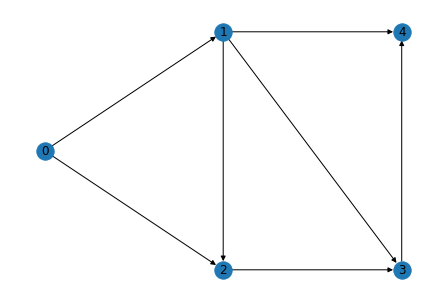

In [28]:
G = nx.DiGraph()

G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from([(0,1), (0, 2),  (1, 2), (1, 3), (1, 4), (2, 3), (3, 4)])

positions = {1: (1,1), 2: (1,0), 3: (2,0), 4: (2,1), 0: (0,0.5)}

nx.draw(G, positions, with_labels=True)

In [29]:
Lambda_ = np.array([
[0, 2/3, 1/3, 0, 0, 0],
[0, 0, 1/4, 1/4, 2/4, 0],
[0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0]
])
omega_ = Lambda_@np.ones(Lambda_.shape[0])
D_ = np.diag(omega_)
P_ = np.linalg.inv(D_)@Lambda_
P_

array([[0.        , 0.66666667, 0.33333333, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25      , 0.25      , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

# a) proportional  rate

In [30]:
def proportional(input_rate = 1):
    time_limit = 60
    eps = 1e-16
    states = []
    times = []
    node_states = np.array([1, 0, 0, 0, 0]) #node 0 has 1 particle
    states.append(node_states.copy())
    times.append(0)
    total_time = 0
    total_particles = sum(node_states)
    it = 0

    while total_time<time_limit:
        it += 1
        t_nexts = list(-np.log(np.random.rand(5))/(node_states+eps))
        inp_time = -np.log(np.random.rand())/input_rate

        mov_time = min(t_nexts)
        if inp_time< mov_time:
            total_particles+=1
            node_states[0]+=1
            total_time+=inp_time
            states.append(node_states.copy())
            times.append(total_time)
            print('Particle added: ', total_time, total_particles, node_states)

            continue

        total_time += mov_time
        sel_node = np.argmin(t_nexts) #np.random.choice(G.nodes(), p = node_probs)

        if sel_node == 4:
            total_particles -= 1
            node_states[4] -= 1

        else:
            des_node = np.random.choice(G.nodes(), p = P[sel_node, :])

            node_states[sel_node] -=1
            node_states[des_node] +=1

        if total_particles < 0:
            inp_time = -np.log(np.random.rand())/input_rate
            total_particles+=1
            node_states[0]+=1
            total_time+=inp_time
        states.append(node_states.copy())
        times.append(total_time)

        print(total_time, total_particles, node_states)
    
    fig, ax = plt.subplots(figsize=(20,7)) 
    for node in range(G.number_of_nodes()):
        plt.plot(times, np.array(states)[:,node], label=node)
    ax.legend()
    plt.xlabel('Time')
    plt.ylabel('Distribution of particles')
    plt.legend()

Particle added:  0.09211067052508226 2 [2 0 0 0 0]
0.11661055697533902 2 [1 1 0 0 0]
Particle added:  0.312901068693577 3 [2 1 0 0 0]
Particle added:  0.4328288002814392 4 [3 1 0 0 0]
Particle added:  0.4802736235410208 5 [4 1 0 0 0]
0.5620015625625853 5 [4 0 0 1 0]
Particle added:  0.6630691355037635 6 [5 0 0 1 0]
0.7235035468662566 6 [4 1 0 1 0]
0.7589884423262135 6 [3 2 0 1 0]
Particle added:  0.7655526424269881 7 [4 2 0 1 0]
0.8118761356941464 7 [4 2 0 0 1]
Particle added:  0.8592192400520412 8 [5 2 0 0 1]
0.8633617836993175 8 [5 1 1 0 1]
0.9054377475324518 8 [4 2 1 0 1]
Particle added:  1.0294159654787378 9 [5 2 1 0 1]
Particle added:  1.04280780728895 10 [6 2 1 0 1]
Particle added:  1.0441690771857706 11 [7 2 1 0 1]
Particle added:  1.2684946866818556 12 [8 2 1 0 1]
Particle added:  1.2801705426498704 13 [9 2 1 0 1]
1.3238105714383352 13 [9 1 1 0 2]
1.3419628822338396 13 [8 1 2 0 2]
1.3557481893577472 13 [7 2 2 0 2]
Particle added:  1.3973861997959267 14 [8 2 2 0 2]
1.52806517029

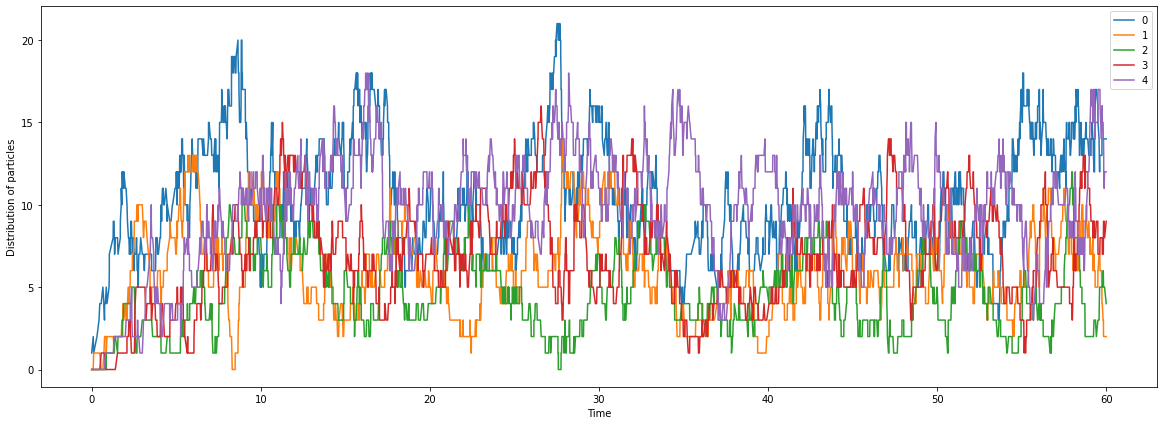

In [32]:
proportional(10)

# b) fixed

In [39]:
def fixed(input_rate):
    time_limit = 60
    eps = 1e-16
    states = []
    times = []
    node_states = np.array([1, 0, 0, 0, 0]) #node 5 has 100 particles
    states.append(node_states.copy())
    times.append(0)
    total_time = 0
    total_particles = sum(node_states)
    it = 0

    while total_time<time_limit:

        t_nexts = list(-np.log(np.random.rand(5))/(np.ones(5)))
        inp_time = -np.log(np.random.rand())/input_rate

        for i in range(len(node_states)):
            if node_states[i] == 0:
                t_nexts[i] = 10e10
        mov_time = min(t_nexts)


        it += 1
        if inp_time< mov_time:
            total_particles+=1
            node_states[0]+=1
            total_time+=inp_time
            states.append(node_states.copy())
            times.append(total_time)
            continue

        total_time += mov_time
        sel_node = np.argmin(t_nexts) #np.random.choice(G.nodes(), p = node_probs)

        if sel_node == 4:
            total_particles -= 1
            node_states[4] -= 1

        else:
            des_node = np.random.choice(G.nodes(), p = P[sel_node, :])

            node_states[sel_node] -=1
            node_states[des_node] +=1

        if total_particles < 0:
            inp_time = -np.log(np.random.rand())/input_rate
            total_particles+=1
            node_states[0]+=1
            total_time+=inp_time
            states.append(node_states.copy())
            times.append(total_time)
    #         break
        print(total_time, total_particles, node_states)
        # fig, ax = plt.subplots(figsize=(20,7)) 
        # for node in range(G.number_of_nodes()):
        #     plt.plot(times, np.array(states)[:,node], label=node)
        # ax.legend()
        # plt.xlabel('Time')
        # plt.ylabel('Distribution of particles')
        # plt.legend()
    return times, states

In [40]:
times, states = fixed(10)

1.0500993659190856 11 [10  1  0  0  0]
1.1154778321489742 13 [11  2  0  0  0]
1.2842341346213686 13 [10  2  1  0  0]
1.312678492631963 13 [10  2  0  1  0]
1.3158829952215298 13 [10  2  0  0  1]
1.6261165588880504 19 [17  2  0  0  0]
1.6598160177159555 19 [16  3  0  0  0]
1.6822518261392854 19 [15  4  0  0  0]
1.7242039602232746 21 [17  3  0  0  1]
2.2965298002308834 27 [22  4  0  0  1]
2.327095774232752 26 [22  4  0  0  0]
2.8896163254696337 29 [25  3  0  0  1]
3.159813130225738 32 [28  2  1  0  1]
3.329517172256299 34 [30  1  1  0  2]
3.9228276354465095 36 [32  0  1  1  2]
3.9355475818324996 37 [33  0  0  2  2]
4.863795704495875 47 [44  0  0  2  1]
4.883457596608031 46 [44  0  0  2  0]
5.502508750997019 55 [53  0  0  1  1]
5.879086598447724 57 [55  0  0  0  2]
6.3603614018600725 63 [60  1  0  0  2]
6.360702495103249 63 [59  1  1  0  2]
6.404992178755364 64 [60  1  0  1  2]
6.8138963144225855 67 [64  1  0  1  1]
6.86720804481549 67 [64  0  0  1  2]
7.093872316354133 69 [65  1  0  1  2]

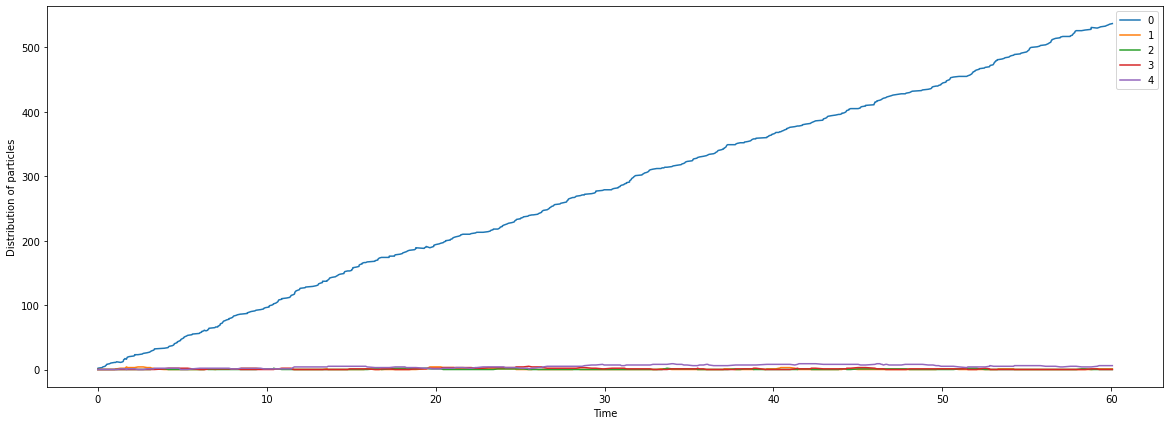

In [41]:
fig, ax = plt.subplots(figsize=(20,7)) 
for node in range(G.number_of_nodes()):
    plt.plot(times, np.array(states)[:,node], label=node)
ax.legend()
plt.xlabel('Time')
plt.ylabel('Distribution of particles')
plt.legend()